<a href="https://colab.research.google.com/github/imakshit/Major-Project/blob/master/diabetes_hypertension_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('/content/d_sih.csv')

In [297]:
df

,Age,Bmi,Drinking,Excercise,Gender,Junk,Sleep,Smoking,Diabetes,Hypertension,Depression,output
0,46,15,1,1,1,2,1,0,88.12,77.05,44.04,2
1,8,34,1,2,0,1,2,0,21.26,45.60,5.35,3
2,63,15,0,3,0,3,1,0,56.64,37.70,49.00,2
3,42,32,0,2,0,2,2,1,42.72,47.40,52.10,1
4,45,30,0,2,1,1,1,1,44.76,20.06,38.68,2
...,...,...,...,...,...,...,...,...,...,...,...,...
991,11,21,0,2,1,3,3,0,5.00,5.00,5.00,1
992,86,35,0,2,0,3,3,0,43.34,56.72,64.10,1
993,84,24,1,1,0,2,2,1,50.76,99.10,41.25,3
994,88,21,1,3,0,1,2,1,19.16,74.60,41.25,3


In [298]:
df.shape

(996, 12)

In [299]:
df.size

11952

In [300]:
df.isnull().sum()

Age             0
Bmi             0
Drinking        0
Excercise       0
Gender          0
Junk            0
Sleep           0
Smoking         0
Diabetes        0
Hypertension    0
Depression      0
output          0
dtype: int64

#DATA VISUALIZATION

In [0]:
dff = df.head(20)
out = dff.iloc[:,11:12].values

In [302]:
out

array([[2],
       [3],
       [2],
       [1],
       [2],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [1],
       [2],
       [1],
       [3],
       [2],
       [2],
       [1],
       [1],
       [2]])

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns

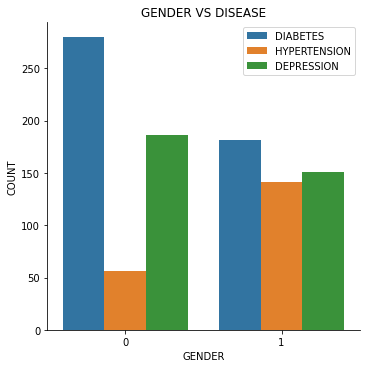

In [304]:
# Countplot 
ax = sns.catplot(x ="Gender", hue ="output",  
kind ="count", data = df , legend = False)

# giving labels to x-axis and y-axis 
ax.set(xlabel ='GENDER', ylabel ='COUNT' ) 

plt.legend(labels=['DIABETES', 'HYPERTENSION' , 'DEPRESSION'])
  
# giving title to the plot 
plt.title('GENDER VS DISEASE'); 

#CONCLUSION

1. Males have higher chances of _Diabetes_ and _Depression_
2. Females have higher chances of _Diabetes_ and _Depression_


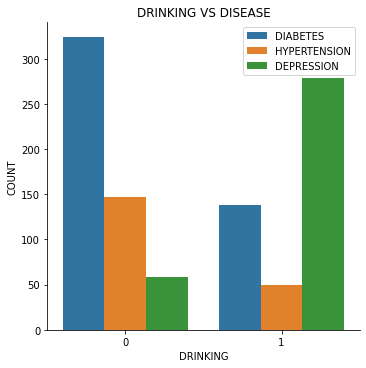

In [305]:
# Countplot 
ax = sns.catplot(x ="Drinking", hue ="output",  
kind ="count", data = df , legend = False)

# giving labels to x-axis and y-axis 
ax.set(xlabel ='DRINKING', ylabel ='COUNT') 

plt.legend( loc='upper right', labels=['DIABETES', 'HYPERTENSION' , 'DEPRESSION'])
  
# giving title to the plot 
plt.title('DRINKING VS DISEASE'); 

#CONCLUSION

1. person who do not drink have a higher chance of _Diabetes_
2. person who drink have a higher chance of _Depression_



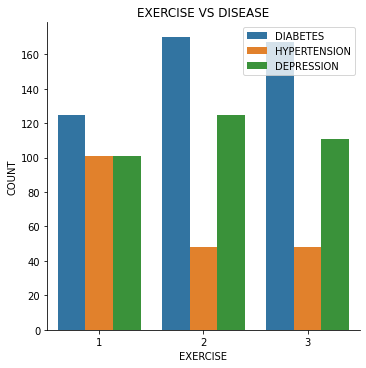

In [306]:
# Countplot 
ax = sns.catplot(x ="Excercise", hue ="output",  
kind ="count", data = df , legend = False)

# giving labels to x-axis and y-axis 
ax.set(xlabel ='EXERCISE', ylabel ='COUNT') 

plt.legend( loc='upper right', labels=['DIABETES', 'HYPERTENSION' , 'DEPRESSION'])
  
# giving title to the plot 
plt.title('EXERCISE VS DISEASE'); 

#CONCLUSION

person who exercise - 
1. once a week have higher chance of _Diabetes_
2. twice a week have higher chance of _Diabetes_ and _Depression_
3. thrice a week have higher chance of _Diabetes_ and _Depression_

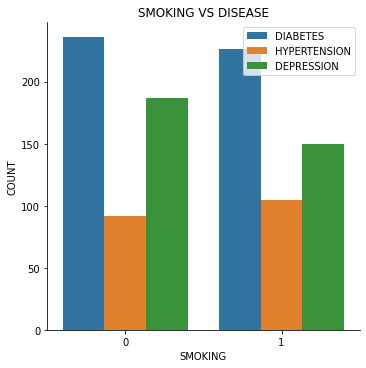

In [307]:
# Countplot 
ax = sns.catplot(x ="Smoking", hue ="output",  
kind ="count", data = df , legend = False)

# giving labels to x-axis and y-axis 
ax.set(xlabel ='SMOKING', ylabel ='COUNT') 

plt.legend( loc='upper right', labels=['DIABETES', 'HYPERTENSION' , 'DEPRESSION'])
  
# giving title to the plot 
plt.title('SMOKING VS DISEASE'); 

#CONCLUSION

1. person who smoke have a higher chance of _Diabetes_ 
2. person who do not smoke have a higher chance of _Diabetes_

#DATA PREPROCESSING

In [0]:
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:11].values

In [309]:
X

array([[46, 15,  1, ...,  2,  1,  0],
       [ 8, 34,  1, ...,  1,  2,  0],
       [63, 15,  0, ...,  3,  1,  0],
       ...,
       [84, 24,  1, ...,  2,  2,  1],
       [88, 21,  1, ...,  1,  2,  1],
       [33, 29,  0, ...,  3,  1,  1]])

In [310]:
y

array([[88.12, 77.05, 44.04],
       [21.26, 45.6 ,  5.35],
       [56.64, 37.7 , 49.  ],
       ...,
       [50.76, 99.1 , 41.25],
       [19.16, 74.6 , 41.25],
       [60.54, 58.  , 90.4 ]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#MODELS

**REGRESSION**

RANDOM FOREST REGRESSOR

In [313]:
from sklearn.ensemble import RandomForestRegressor
classifier= RandomForestRegressor(n_estimators = 300, random_state = 0)
classifier.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [315]:
#accuracy on test data
classifier.score(X_test , y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8719862356696435

In [316]:
#accuracy on train data
classifier.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9850118254098408

DECISION TREE REGRESSOR

In [0]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [318]:
#accuracy on test data
regressor.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.7627213037221848

In [319]:
#accuracy on train data
regressor.score(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


1.0

LINEAR REGRESSOR

In [320]:
from sklearn.linear_model import LinearRegression
regressors = LinearRegression()
regressors.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressors.predict(X_test)

In [322]:
#accuracy on test data
regressors.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.5622468901441744

In [323]:
#accuracy in train data
regressors.score(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.5116813654442292

#score function explaination


1. you train one model logreg.train(Xtrain,Ytrain)

2. the resulting model does not explain the training data 100% well (that would probably be overfitting).

3. if you use now the Xtrain to make predictions you will not get exactly Ytrain, but Ytrain', different somehow Ytrain' = logreg.predict(X_train)

logreg.score(Xtrain,Ytrain) is calculating the difference between Ytrain and Ytrain' (an accuracy measure), but you did not need to explicitly calculate Y_train'. The library does this internally.

If you try this (once the model trained with the train data):

    Y_pred = logreg.predict(X_test)

    logreg.score(X_test,Y_pred)
this score will always give 1.0

(because it compares Ypred' (which the library calculates internally as Ypred'= logreg.predict(Xtest) ) with Ypred; but Ypred is also logreg.predict(Xtest), because the code we wrote)

if Ytest is the real labels for Xtest

    logreg.score(X_test, Y_test) 
is comparing the predictions of the model against the real labels.

In other words:

A. predictor.score(X,Y) internally calculates Y'=predictor.predict(X) and then compares Y' against Y to give an accuracy measure. This applies not only to logistic regression but to any other model.

B. logreg.score(Xtrain,Ytrain) is measuring the accuracy of the model against the training data. (How well the model explains the data it was trained with). <-- But note that this has nothing to do with test data.

C. logreg.score(Xtest, Ytest) is equivalent to your print(classificationreport(Ytest, Ypred)). But you do not need to calculate Ypred; that is done internally by the library

#CONCLUSION

_RANDOM FOREST REGRESSOR_ is the best model for analysis giving an accuracy of 0.87 on prediction.